In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
# Removing unwanted columns from data frame
def cleaningColumns(dataF):
    dataF.drop('type_emplacement', axis=1, inplace=True)
    dataF.drop('domanialite', axis=1, inplace=True)
    dataF.drop('complement_addresse', axis=1, inplace=True)
    dataF.drop('numero', axis=1, inplace=True)
    dataF.drop('id_emplacement', axis=1, inplace=True)
    dataF.drop('variete', axis=1, inplace=True)
    dataF.drop('geo_point_2d_a', axis=1, inplace=True)
    dataF.drop('geo_point_2d_b', axis=1, inplace=True)
    dataF.drop('stade_developpement', axis=1, inplace=True)
    dataF.drop('remarquable', axis=1, inplace=True)
    return dataF


# Removing unwanted lines from data frame
def cleaningRows(dataF):
    dataF.drop(dataF.index[(dataF["circonference_cm"] <= 0)], axis=0, inplace=True)
    dataF.drop(dataF.index[(dataF["hauteur_m"] <= 0)], axis=0, inplace=True)
    # biggest circumference paris tree 4,70 m -> 470 cm
    dataF.drop(dataF.index[(dataF["circonference_cm"] > 470)], axis=0, inplace=True)
    # tallest paris tree 35 m -> 3500 cm
    dataF.drop(dataF.index[(dataF["hauteur_m"] > 40)], axis=0, inplace=True)
    return dataF

In [4]:
# Returns tree number
def getTreeNumber(dataF):
    count = len(dataF)
    print("Total number of trees:", count, '\n')
    return count


# Returns data frame columns
def getColumns(dataF):
    return dataF.columns.values


# Prints data frame's columns
def printColumns(col):
    print(col)
    print(len(col))

In [5]:
filename = "./resources/p2-arbres-fr.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=';')
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


In [6]:
# Data clean up
data = cleaningColumns(data)
data = cleaningRows(data)

In [7]:
# Important values 
columns = getColumns(data)
row_count = getTreeNumber(data)

Total number of trees: 159923 



In [8]:
# Save cleaned up csv
data.to_csv('./resources/cleanedDF.csv', encoding='utf-8', sep=';')  # index = False to remove previous index column
data.reset_index(drop=True)

,id,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m
0,99874,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5
1,99875,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8
2,99876,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10
3,99877,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8
4,99881,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,Platanus,x hispanica,260,17
...,...,...,...,...,...,...,...,...
159918,2023464,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5
159919,2023465,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5
159920,2023466,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5
159921,2023467,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5


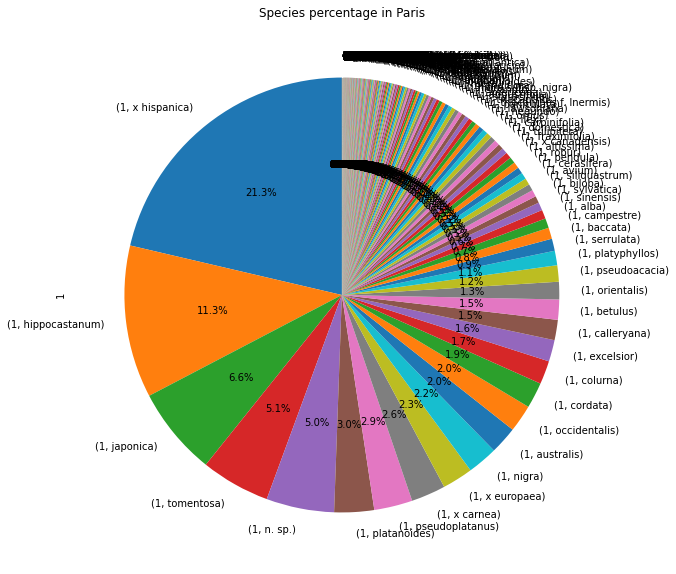

In [9]:
# Top 10 most present species in Paris
species_group = data.assign(dummy=1).groupby(['dummy', 'espece']).size().\
    groupby(level=0).apply(lambda x: 100 * x / x.sum()).sort_values(ascending=False)
species_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Species percentage in Paris')
plt.savefig("./resources/species_percentage.png")
plt.show()

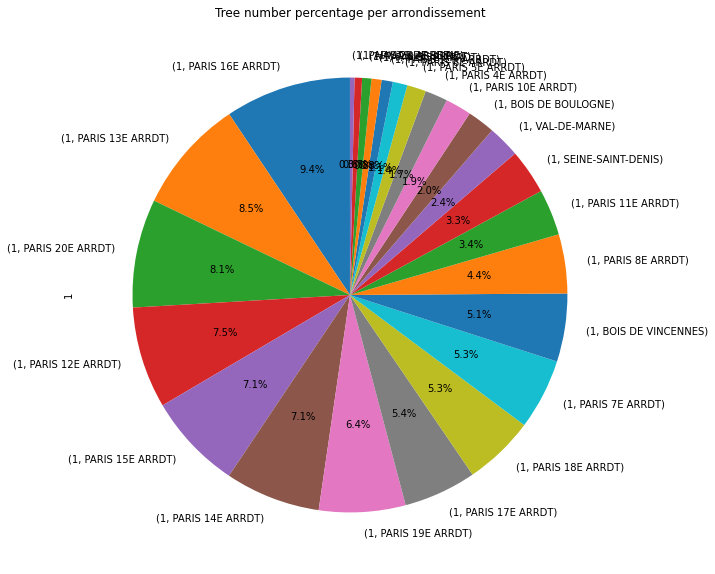

In [10]:
# Tree number percentage per 'arrondissement'
arron_group = data.assign(dummy=1).groupby(['dummy', 'arrondissement']).size().\
    groupby(level=0).apply(lambda x: 100 * x / x.sum()).sort_values(ascending=False)
arron_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Tree number percentage per arrondissement')
plt.savefig("./resources/arrondissement_percentage.png")
plt.show()

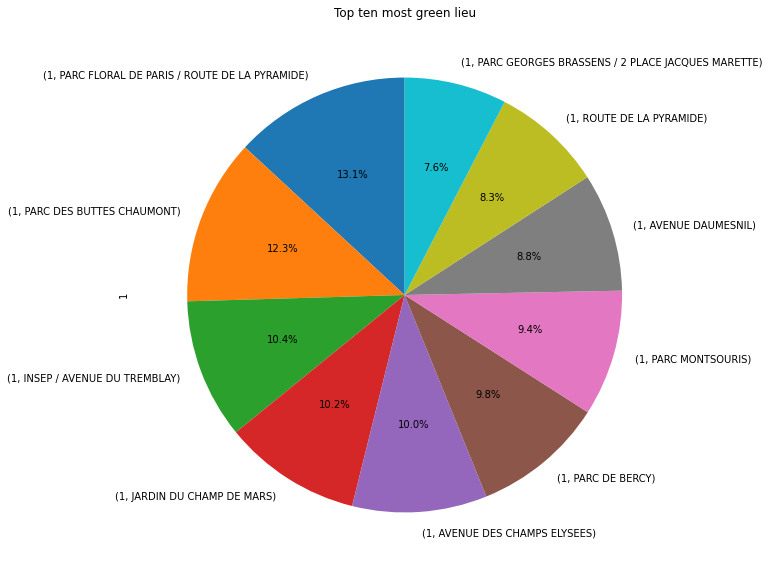

In [11]:
# Tree number percentage per 'lieu'
lieu_group = data.assign(dummy=1).groupby(['dummy', 'lieu']).size().\
    groupby(level=0).apply(lambda x: 100 * x / x.sum()).sort_values(ascending=False)
lieu_group.head(10).plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Top ten most green lieu')
plt.savefig("./resources/top_ten_lieu.png")
plt.show()

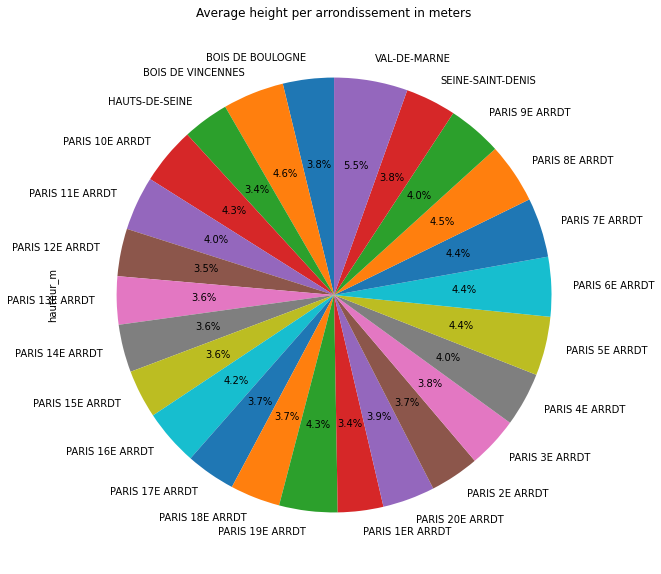

In [12]:
# Height average per arrondissement
hauteur_mean = data.groupby(['arrondissement'])['hauteur_m'].mean()
hauteur_mean.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Average height per arrondissement in meters')
plt.savefig("./resources/average_height_per_arrondissement.png")
plt.show()

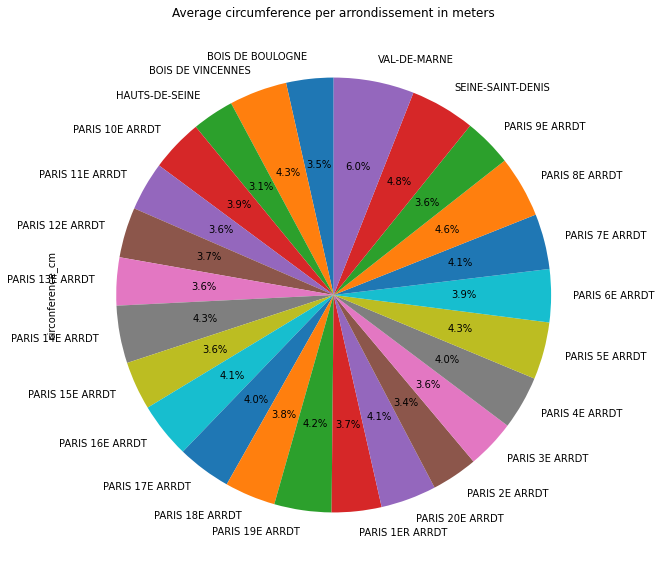

In [13]:
# Circumference average per arrondissement
circum_mean = data.groupby(['arrondissement'])['circonference_cm'].mean()
circum_mean.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Average circumference per arrondissement in meters')
plt.savefig("./resources/average_circumference_per_arrondissement.png")
plt.show()